In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from scipy.stats.stats import pearsonr
# import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.spatial.distance import pdist, squareform
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

import hypertools as hyp

In [2]:
songs = pd.read_csv("music.csv")
songs = songs.drop_duplicates()
songs = songs.reset_index()

In [3]:
songs.head()

,index,artist.hotttnesss,artist.id,artist.name,artist_mbtags,artist_mbtags_count,bars_confidence,bars_start,beats_confidence,beats_start,...,start_of_fade_out,tatums_confidence,tatums_start,tempo,terms,terms_freq,time_signature,time_signature_confidence,title,year
0,0,0.401998,ARD7TVE1187B99BFB1,Casual,NaN,0.0,0.643,0.58521,0.834,0.58521,...,218.932,0.779,0.28519,92.198,hip hop,1.000000,4.0,0.778,I Didn't Mean To,0
1,1,0.417500,ARMJAGH1187FB546F3,The Box Tops,classic pop and rock,1.0,0.007,0.71054,1.000,0.20627,...,137.915,0.969,0.20627,121.274,blue-eyed soul,1.000000,4.0,0.384,Soul Deep,1969
2,2,0.343428,ARKRRTF1187B9984DA,Sonora Santanera,NaN,0.0,0.980,0.73152,0.980,0.73152,...,172.304,0.482,0.42132,100.070,salsa,1.000000,1.0,0.000,Amor De Cabaret,0
3,3,0.454231,AR7G5I41187FB4CE6C,Adam Ant,uk,1.0,0.017,1.30621,0.809,0.81002,...,217.124,0.601,0.56254,119.293,pop rock,0.988584,4.0,0.000,Something Girls,1982
4,4,0.401724,ARXR32B1187FB57099,Gob,NaN,0.0,0.175,1.06368,0.883,0.13576,...,198.699,1.000,0.13576,129.738,pop punk,0.887288,4.0,0.562,Face the Ashes,2007


In [4]:
import csv 
fpath = "music.csv"
with open(fpath, 'r') as infile:
    reader = csv.DictReader(infile)
    fieldnames = reader.fieldnames
fieldnames

['artist.hotttnesss',
 'artist.id',
 'artist.name',
 'artist_mbtags',
 'artist_mbtags_count',
 'bars_confidence',
 'bars_start',
 'beats_confidence',
 'beats_start',
 'duration',
 'end_of_fade_in',
 'familiarity',
 'key',
 'key_confidence',
 'latitude',
 'location',
 'longitude',
 'loudness',
 'mode',
 'mode_confidence',
 'release.id',
 'release.name',
 'similar',
 'song.hotttnesss',
 'song.id',
 'start_of_fade_out',
 'tatums_confidence',
 'tatums_start',
 'tempo',
 'terms',
 'terms_freq',
 'time_signature',
 'time_signature_confidence',
 'title',
 'year']

In [5]:
songs["finalmode"] = songs["mode"] * songs["mode_confidence"]

In [6]:
songs["time_signature_final"] = songs["time_signature"] *songs["time_signature_confidence"]

In [7]:
songs["key_final"] = songs["key"] * songs["key_confidence"]

In [8]:
songs['mode'][0]

0

In [9]:
#songs = songs.drop(["mode"],axis=1)
songs = songs.drop(["mode_confidence"],axis=1)
songs = songs.drop(["time_signature"],axis=1)
songs = songs.drop(["time_signature_confidence"],axis=1)
#songs = songs.drop(["key"],axis=1)
songs = songs.drop(["key_confidence"],axis=1)
# songs = songs.drop(["energy"],axis=1)
songs = songs.drop(["year"],axis=1)
songs.head()

,index,artist.hotttnesss,artist.id,artist.name,artist_mbtags,artist_mbtags_count,bars_confidence,bars_start,beats_confidence,beats_start,...,start_of_fade_out,tatums_confidence,tatums_start,tempo,terms,terms_freq,title,finalmode,time_signature_final,key_final
0,0,0.401998,ARD7TVE1187B99BFB1,Casual,NaN,0.0,0.643,0.58521,0.834,0.58521,...,218.932,0.779,0.28519,92.198,hip hop,1.000000,I Didn't Mean To,0.000,3.112,0.736
1,1,0.417500,ARMJAGH1187FB546F3,The Box Tops,classic pop and rock,1.0,0.007,0.71054,1.000,0.20627,...,137.915,0.969,0.20627,121.274,blue-eyed soul,1.000000,Soul Deep,0.000,1.536,1.014
2,2,0.343428,ARKRRTF1187B9984DA,Sonora Santanera,NaN,0.0,0.980,0.73152,0.980,0.73152,...,172.304,0.482,0.42132,100.070,salsa,1.000000,Amor De Cabaret,0.565,0.000,5.144
3,3,0.454231,AR7G5I41187FB4CE6C,Adam Ant,uk,1.0,0.017,1.30621,0.809,0.81002,...,217.124,0.601,0.56254,119.293,pop rock,0.988584,Something Girls,0.749,0.000,0.000
4,4,0.401724,ARXR32B1187FB57099,Gob,NaN,0.0,0.175,1.06368,0.883,0.13576,...,198.699,1.000,0.13576,129.738,pop punk,0.887288,Face the Ashes,0.371,2.248,0.184


In [10]:
songs = songs.replace(to_replace=np.NaN,value=0.00)

In [11]:
songs.describe()

,index,artist.hotttnesss,artist_mbtags_count,bars_confidence,bars_start,beats_confidence,beats_start,duration,end_of_fade_in,familiarity,...,release.id,song.hotttnesss,start_of_fade_out,tatums_confidence,tatums_start,tempo,terms_freq,finalmode,time_signature_final,key_final
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,4999.50000,0.385552,0.524686,0.239595,1.065246,0.613963,0.428497,240.622038,0.756708,0.565230,...,371024.058400,0.193626,229.883436,0.507875,0.299886,122.900913,2.248903e+02,0.342651,2.004091,4.056901
std,2886.89568,0.143647,0.884095,0.288259,1.723468,0.322441,0.806217,246.084090,1.858958,0.160528,...,236777.828209,0.251809,112.024303,0.332357,0.510925,35.204746,2.239216e+04,0.278962,4.136339,172.637583
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,1.044440,0.000000,0.000000,...,0.000000,0.000000,-21.394000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2499.75000,0.325266,0.000000,0.035000,0.441590,0.409750,0.194655,176.032200,0.000000,0.467570,...,172858.000000,0.000000,168.855750,0.237000,0.110692,96.959500,9.476125e-01,0.000000,0.261000,0.339750
50%,4999.50000,0.380742,0.000000,0.120000,0.785460,0.686000,0.332585,223.059140,0.199000,0.563584,...,333103.000000,0.000000,213.864500,0.500000,0.191520,120.156500,9.999728e-01,0.396000,2.008000,1.615500
75%,7499.25000,0.453858,1.000000,0.351000,1.224075,0.882000,0.500753,276.375060,0.421000,0.668020,...,573532.500000,0.405116,266.274750,0.774250,0.294743,144.006750,1.000000e+00,0.569000,3.176000,3.850000
max,9999.00000,1.082503,9.000000,8.855240,59.743540,1.000000,12.245830,22050.000000,43.119000,1.000000,...,823599.000000,1.000000,1813.426000,9.227560,12.245830,262.828000,2.239217e+06,1.000000,384.725348,17264.542418


In [12]:
q = songs

q = q._get_numeric_data()

In [13]:
kmeans_model = KMeans(n_clusters = 15, random_state = 1)
y_pred=kmeans_model.fit_predict(q)
center= kmeans_model.cluster_centers_


In [14]:
kmeans_model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

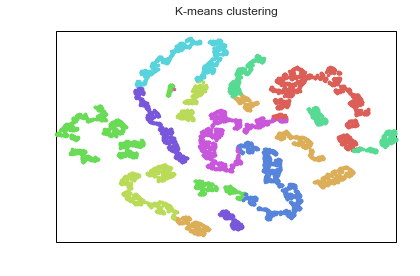

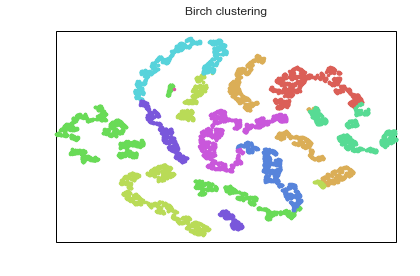

In [38]:
labels_10 = hyp.cluster(q, n_clusters = 10)
labels_birch = hyp.cluster(q, cluster = 'Birch', n_clusters=10)

geo  = hyp.plot(q, '.', reduce='TSNE', ndims=2, group=labels_10, title='K-means clustering')
geo  = hyp.plot(q, '.', reduce='TSNE', ndims=2, group=labels_birch, title='Birch clustering')


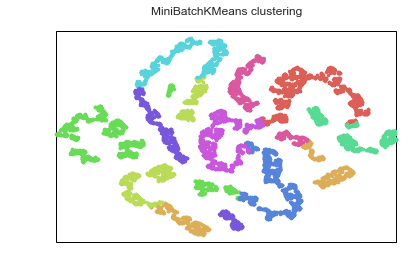

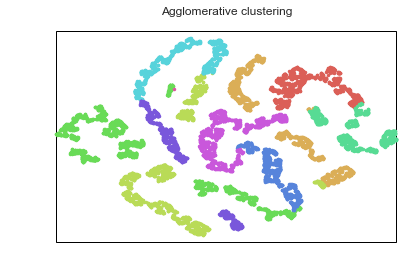

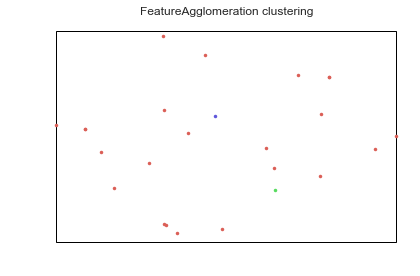

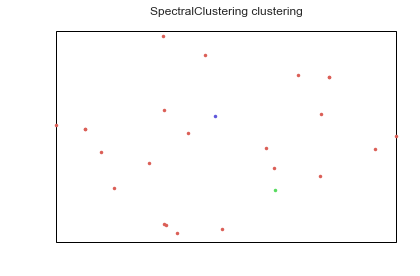

In [37]:
labels_minibatch = hyp.cluster(q, cluster = 'MiniBatchKMeans', n_clusters=10)
labels_agg = hyp.cluster(q, cluster = 'AgglomerativeClustering', n_clusters = 10)
labels_feat = hyp.cluster(q, cluster = 'FeatureAgglomeration')
labels_spec = hyp.cluster(q, cluster = 'FeatureAgglomeration')

geo  = hyp.plot(q, '.', reduce='TSNE', ndims=2, group=labels_minibatch, title='MiniBatchKMeans clustering')
geo  = hyp.plot(q, '.', reduce='TSNE', ndims=2, group=labels_agg,       title='Agglomerative clustering')
geo  = hyp.plot(q, '.', reduce='TSNE', ndims=2, group=labels_feat,       title='FeatureAgglomeration clustering')
geo  = hyp.plot(q, '.', reduce='TSNE', ndims=2, group=labels_spec,       title='SpectralClustering clustering')

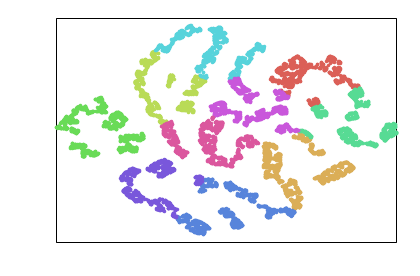

In [27]:
# plot
hyp.plot(q, '.', reduce='TSNE', ndims=2, n_clusters=10)

In [45]:
q = np.array(q)
q

array([[0.00000000e+00, 4.01997543e-01, 0.00000000e+00, ...,
        9.21980000e+01, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.17499645e-01, 1.00000000e+00, ...,
        1.21274000e+02, 1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 3.43428378e-01, 0.00000000e+00, ...,
        1.00070000e+02, 1.00000000e+00, 5.65000000e-01],
       ...,
       [9.99700000e+03, 2.89902932e-01, 0.00000000e+00, ...,
        1.18123000e+02, 9.60115004e-01, 5.65000000e-01],
       [9.99800000e+03, 2.16828886e-01, 0.00000000e+00, ...,
        1.37663000e+02, 1.00000000e+00, 5.03000000e-01],
       [9.99900000e+03, 5.09243099e-01, 0.00000000e+00, ...,
        1.50575000e+02, 9.26219624e-01, 0.00000000e+00]])

In [43]:
user = pd.read_csv("data/kaggle_visible_evaluation_triplets.txt",nrows = 100000)

In [47]:
tab = lambda x: pd.Series([i for i in x.split('\t')])
user = user['fd50c4007b68a3737fe052d5a4f78ce8aa117f3d	SOBONKR12A58A7A7E0	1'].apply(tab)

In [48]:
user = user.rename(index=str, columns={0: "userid", 1: "songid", 2 : "count"})

In [49]:
user.head()

,userid,songid,count
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOXLOQG12AF72A2D55,1


In [50]:
# Divide dataset into training data and testing dataset
# Training dataset is 80% and testing dataset is 20%

trainingdata = user.ix[:80000,:]
testingdata = user.ix[80000:100000,:]

In [51]:
trainingdata.head()

,userid,songid,count
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOXLOQG12AF72A2D55,1


In [52]:
testingdata.head()

,userid,songid,count
80000,af4773579e255b23589590ecad0648e27adf5f7f,SOWCKVR12A8C142411,1
80001,af4773579e255b23589590ecad0648e27adf5f7f,SOVFBUL12A58A7B498,1
80002,af4773579e255b23589590ecad0648e27adf5f7f,SOQUJLT12A8C141F8A,1
80003,af4773579e255b23589590ecad0648e27adf5f7f,SONYKOW12AB01849C9,16
80004,af4773579e255b23589590ecad0648e27adf5f7f,SODWUBY12A6D4F8E8A,1


In [54]:
song = trainingdata.merge(songs, left_on='songid', right_on='song.id', how='inner')

In [57]:
test = song.groupby('userid').mean()
test

,index,artist.hotttnesss,artist_mbtags_count,bars_confidence,bars_start,beats_confidence,beats_start,duration,end_of_fade_in,familiarity,...,longitude,loudness,release.id,song.hotttnesss,start_of_fade_out,tatums_confidence,tatums_start,tempo,terms_freq,finalmode
userid,,,,,,,,,,,,,,,,,,,,,
0011d5f4fb02ff276763d385c3f2ded2b00ad94a,3886.0,0.922412,1.0,0.003000,0.397490,0.655000,0.397490,245.367710,2.101000,0.889749,...,-63.933358,-4.536000,382330.0,0.853829,234.185000,0.743000,0.397490,160.7860,0.970217,0.676000
00a80e20a8b269747ad5f511fb579ef9ec013941,560.0,0.780334,9.0,0.082000,0.805450,0.482000,0.444130,252.342400,0.000000,0.852136,...,-63.933358,-3.028000,311757.0,0.801014,244.941000,0.155000,0.444130,167.4860,0.973315,0.462000
0107197bd5e2521cfa1cfde3faf9a6b39e8ba9e3,1781.0,0.713670,3.0,0.061000,1.378140,0.000000,0.351910,524.877910,0.708000,0.844085,...,-63.933358,-7.219000,15638.0,0.701040,500.018000,0.508000,0.100660,118.1010,0.938552,0.405000
0118d4558afda9bdaa39ec3ea3dbe62f12604d4d,2687.0,0.316853,1.0,0.243000,1.016680,0.505000,0.246520,411.689340,2.397000,0.612245,...,-63.933358,-7.172000,85226.0,0.270776,407.696000,0.205000,0.055420,156.0660,1.000000,0.340000
0160c5e9f3c439d601d379ea0d284e3979b4fc19,8604.0,0.554633,1.0,0.372000,0.052160,1.000000,0.052160,216.606890,0.000000,0.902063,...,-87.632410,-5.721000,186934.0,0.648463,201.201000,0.759000,0.052160,200.1140,1.000000,0.475000
026db54b18e6e1c8273d82f2f6b1f1c81676d01b,833.0,0.639798,0.0,0.034000,0.889970,0.652000,0.223800,417.671380,0.000000,0.830593,...,-73.948880,-7.865000,304844.0,0.653307,417.671000,0.402000,0.052700,181.5490,0.999946,0.289000
02caaa0349f5d7aa54a6a262308a4ada43ad46d2,6878.0,0.507464,1.0,0.029000,0.423840,1.000000,0.423840,211.695870,0.139000,0.754918,...,-2.632650,-7.750000,786795.0,0.864249,198.536000,0.988000,0.159650,113.3590,1.000000,0.434000
02e4af8e545c96c98359bc875a2db8f1e28bc42b,9734.0,0.579989,1.0,0.008000,1.361370,0.561000,0.683500,228.335870,4.180000,0.744641,...,-63.933358,-5.571000,7133.0,0.708108,206.065000,0.968000,0.342380,88.4710,0.999932,0.169000
03ace7391031faa7d9b152f39fe78cb57e0f078c,4139.0,0.335369,0.0,0.286000,0.187160,0.000000,0.187160,203.232200,0.160000,0.782556,...,-83.222950,-4.703000,605380.0,0.000000,200.121000,1.000000,0.187160,104.7100,0.992642,0.480000


In [58]:
test = test.dropna()

In [61]:
allusers = test.index

In [62]:
reco = []
count = 0
for i in allusers:
    currentuser = []
    currentuser.append(i)
    thisuser = list(test.loc[i])
    neigh = NearestNeighbors(n_neighbors=10)
    neigh.fit(q)
    NearestNeighbors(algorithm='ball_tree', leaf_size=100,metric='euclidean')
    distance, indices = neigh.kneighbors([thisuser])
    indices=list(indices[0])
    for ind in indices:
        currentuser.append(songs.ix[ind]["song.id"])
    count += 1
    reco.append(currentuser)

In [63]:
recommendations = pd.DataFrame(data = reco, columns = ["user_id","song1","song2","song3","song4","song5","song6","song7","song8","song9","song10"])
recommendations

,user_id,song1,song2,song3,song4,song5,song6,song7,song8,song9,song10
0,0011d5f4fb02ff276763d385c3f2ded2b00ad94a,SOTNWCI12AAF3B2028,SOXIDBV12AAF3B3B76,SOVCFPI12AAF3B2045,SOOBSJA12AAA8C7724,SOETFHY12AAF3B3FD4,SOUATZO12AAF3B23A7,SOMBCOW12AAF3B229F,SOZWZEH12AAF3B2578,SOFCKRY12AAF3B2FAF,SOLVEAC12AAF3B2DC2
1,00a80e20a8b269747ad5f511fb579ef9ec013941,SOGAUIQ12A6D4F8262,SOZIMLB12AF72AD1CD,SOUHRQN12A58A7C12A,SONCYFS12A8C14261E,SOPYZLU12A8C14193C,SOCZSYW12AAF3B490E,SOBOAQC12A8C13E3E9,SOISAFU12CF5F882E5,SOULMYP12A8C143D8B,SOWCQMB12A8C141825
2,0107197bd5e2521cfa1cfde3faf9a6b39e8ba9e3,SOIHJSD12A6701EB04,SOGMROZ12A679D8AE9,SOFOYJY12A679D30E3,SOXVSTI12A6310ECC7,SONQNPM12A67020A32,SOXYGNC12A67021C29,SOPOFBK12AF729EEBE,SOYGIBP12A67020AF7,SOQUGRT12A6701DD47,SOJCBAM12A6701FD04
3,0118d4558afda9bdaa39ec3ea3dbe62f12604d4d,SOMBWDW12A6D4F7248,SOEKSLB12A6D4F56FE,SOHTPZM12A6D4F8716,SOIMTBN12A6D4F56FA,SOCNGFJ12A6D4F6DFD,SORCHVC12A6D4F7651,SOMTYWT12A58A75BF7,SOHHVXI12A6D4F69E3,SOIJZUS12A6D4F73B1,SOCZJSH12A6D4F7636
4,0160c5e9f3c439d601d379ea0d284e3979b4fc19,SOKZILC12A6D4FBC9D,SOZEPNS12A8AE4766D,SORAACY12A8AE475D2,SOUBALJ12A8AE46A0B,SOOXNKG12A58A7C6BC,SOOVLKO12A58A7F7BA,SOESGIR12A8AE4855D,SOGXSWA12A6D4FBC99,SOFHWUZ12A8AE48B9D,SOTRAIA12A8AE47465
5,026db54b18e6e1c8273d82f2f6b1f1c81676d01b,SOWXKLQ12A8C13C221,SOSLEMJ12A8C13F86B,SOKQDCA12A8C13CDEF,SOUSQZF12A8C13BBB9,SOVOWRW12A8C13B93D,SOHBATX12A8C14009F,SORJVDO12AF72A1970,SOIQFYV12A8C13EEB6,SOMDTTT12A8C13F1CB,SOKQDCS12AF72A920F
6,02caaa0349f5d7aa54a6a262308a4ada43ad46d2,SOCWJDB12A58A776AF,SONERDT12AB017EE72,SOVSNJX12AB0189848,SOONBLX12AC468AA6B,SOLWZMY12AB0182AAD,SOUQZLK12AC468B143,SOFKPLB12AC95F0493,SORRNTH12AC960A43B,SOBUVXZ12AC9075605,SOWTJRG12AC9075799
7,02e4af8e545c96c98359bc875a2db8f1e28bc42b,SOPDFZN12A670215C4,SOUJKAH12A6701F2A5,SOGDAUG12A6701F302,SOGIUWE12A670215DC,SOSBPUO12A58291CF2,SOGPEMQ12A67020412,SOBXZGV12A6702074F,SOFGAJF12A8C141DA3,SOQZZKI12A67020D38,SOPIHQU12A670200C6
8,03ace7391031faa7d9b152f39fe78cb57e0f078c,SOWVTCS12AC468543B,SOEVOMG12AC4688558,SOYBGAI12AC468AA34,SOPNFYY12AB01828D4,SOACEXG12AC468D8FB,SOHFZQQ12A58A7FA07,SOGXKOP12A58A7FA1C,SOMQNVZ12AC468A9AD,SOVDNXZ12AC3DF9EA4,SOYYHWG12AC3DF9F08
9,03b9807f06e6843382f1443ce56d9e32dd087e0c,SOULTKQ12AB018A183,SOKFHLV12AB0187A2F,SOSLLDN12AB018CA89,SOZXLAE12AB018AB74,SOROOOR12AB018572F,SOKRHQK12AB018CCC0,SOTCXIY12AB0183D7A,SOHBIKA12AB01857DB,SOCJPYJ12AB0188BCC,SOBACBP12AB0188B9F


In [65]:
keydict = {}
for user, song in zip(trainingdata.userid, trainingdata.songid):
    try:
        keydict[user].append(song)
    except KeyError:
        keydict[user] = []
        keydict[user].append(song)

In [67]:
reco = {}
for user, song1 in zip(recommendations.user_id, recommendations.song1):
    try:
        reco[user].append(song1)
    except KeyError:
        reco[user] = []
        reco[user].append(song1)
        
for user, song2 in zip(recommendations.user_id, recommendations.song2):
    try:
        reco[user].append(song2)
    except KeyError:
        reco[user] = []
        reco[user].append(song2)
        
for user, song3 in zip(recommendations.user_id, recommendations.song3):
    try:
        reco[user].append(song3)
    except KeyError:
        reco[user] = []
        reco[user].append(song3)
        
for user, song4 in zip(recommendations.user_id, recommendations.song4):
    try:
        reco[user].append(song4)
    except KeyError:
        reco[user] = []
        reco[user].append(song4)


for user, song5 in zip(recommendations.user_id, recommendations.song5):
    try:
        reco[user].append(song5)
    except KeyError:
        reco[user] = []
        reco[user].append(song5)
        
        
for user, song6 in zip(recommendations.user_id, recommendations.song6):
    try:
        reco[user].append(song6)
    except KeyError:
        reco[user] = []
        reco[user].append(song6)
        
for user, song7 in zip(recommendations.user_id, recommendations.song7):
    try:
        reco[user].append(song7)
    except KeyError:
        reco[user] = []
        reco[user].append(song7)
        
for user, song8 in zip(recommendations.user_id, recommendations.song8):
    try:
        reco[user].append(song8)
    except KeyError:
        reco[user] = []
        reco[user].append(song8)
        
for user, song9 in zip(recommendations.user_id, recommendations.song9):
    try:
        reco[user].append(song9)
    except KeyError:
        reco[user] = []
        reco[user].append(song9)
        
for user, song10 in zip(recommendations.user_id, recommendations.song10):
    try:
        reco[user].append(song10)
    except KeyError:
        reco[user] = []
        reco[user].append(song10)

In [68]:
match = 0
nonmatch = 0
count = 0
for i in reco:
    recoset = set(reco[i])
    if i in keydict:
        keydictset = set(keydict[i])
        matches = (recoset - (recoset - keydictset))
        match += len(matches)
        nonmatch += 10 - len(matches)

In [69]:
match = float(match)
nonmatch = float(nonmatch)

In [70]:
totalreco = recommendations.shape[0]*(recommendations.shape[1]-1)
totalreco

In [73]:
precision = float(match/(match+nonmatch))
precision

0.08698010849909583

In [74]:
songs_sample = songs.set_index("song.id")

In [75]:
mylist = []
for i in range(1,len(recommendations.ix[0])):
    mylist.append(songs_sample.ix[recommendations.ix[0][i]]["title"])
    
samplerecommendation = pd.DataFrame(data = mylist)
samplerecommendation = samplerecommendation.rename(index=str, columns={0: recommendations.ix[0][0]})

In [76]:
samplerecommendation

,0011d5f4fb02ff276763d385c3f2ded2b00ad94a
0,The Way I Loved You
1,Nostradamus
2,Should've Said No
3,Jack and Benton
4,Knight -> King 4
5,When I Get Home
6,On Efface
7,Pai Keros
8,Rainin' In My Heart
9,Pee Wee's Boogie


#### Reference

https://github.com/prachi108/Million-Song-Project